In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters() #  function ensures compatibility between pandas datetime objects and matplotlib plotting functions.

# Import data 
df = pd.read_csv('fcc-forum-pageviews.csv', index_col="date", parse_dates=["date"])

# Looking at the data
df.tail(10)



,value
date,
2019-11-24,138875
2019-11-25,219608
2019-11-26,220590
2019-11-27,208223
2019-11-28,202049
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-02,220144


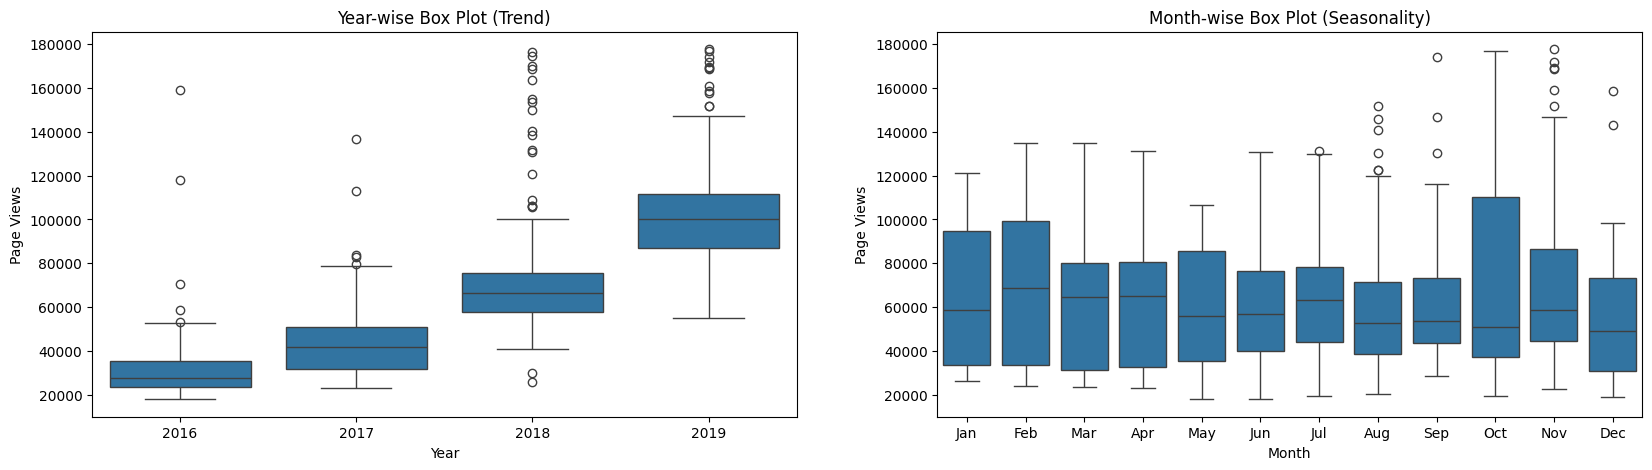

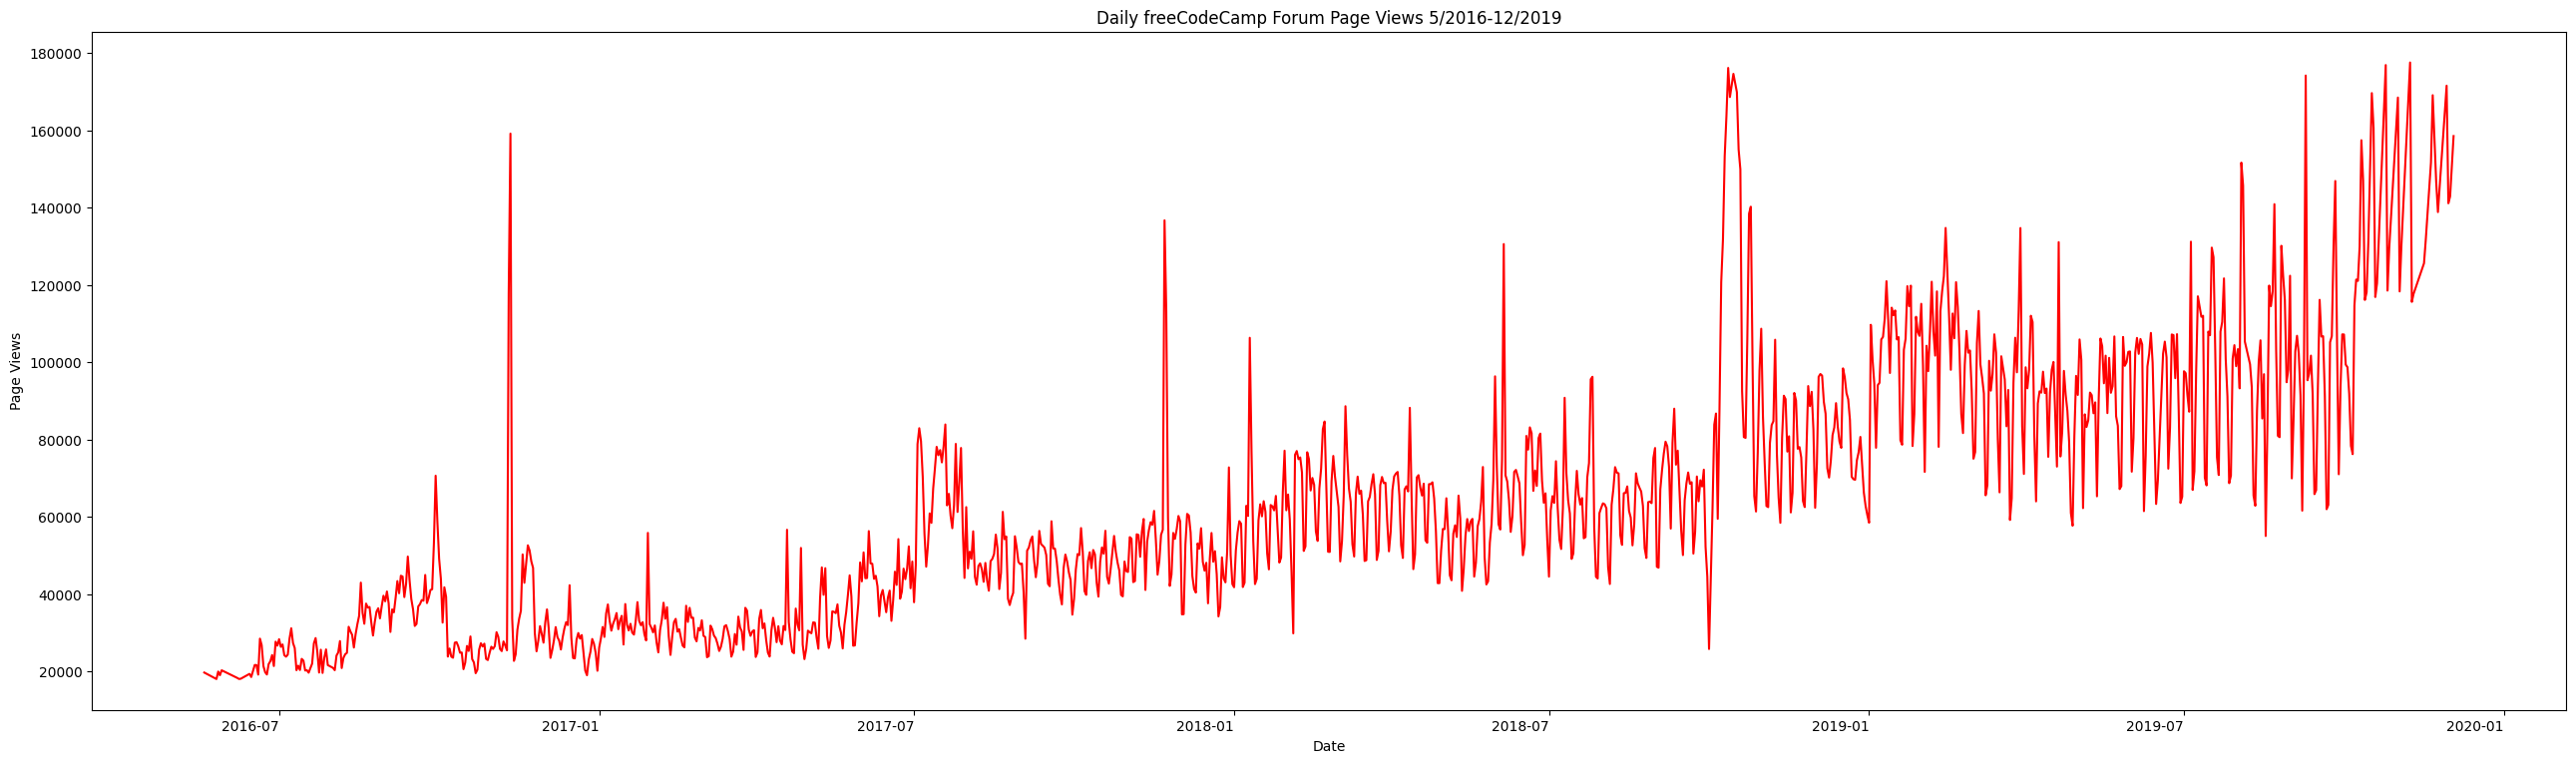

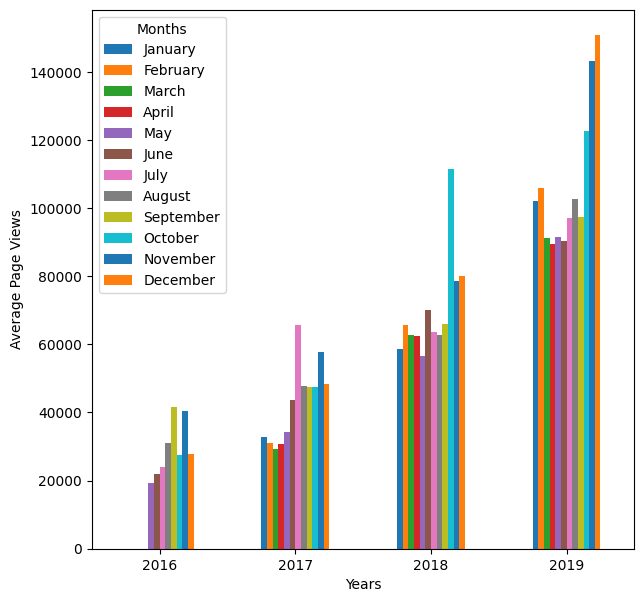

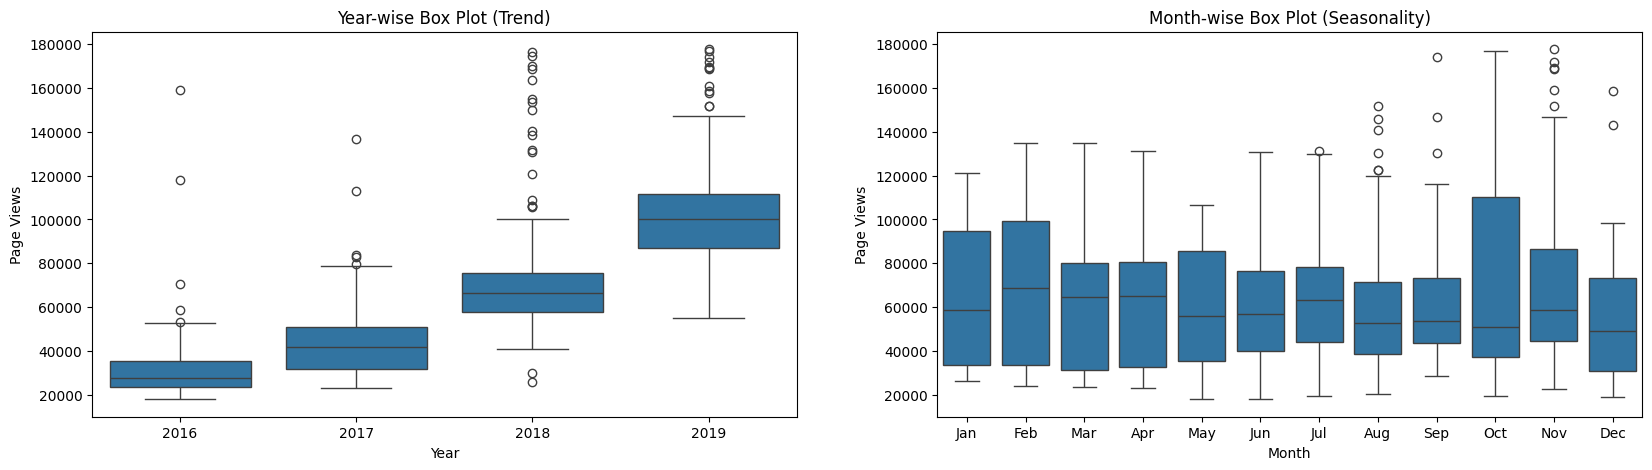

In [35]:
# Clean data from extreme values
df = df [ (df["value"]>=df["value"].quantile(0.025)) &
    (df["value"]<=df["value"].quantile(0.975)) ]


def draw_line_plot():
    fig = df.plot.line(figsize=(32,10), color='red', legend=False).figure
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.xticks(rotation = 0) # ensures tht numbers on x line dont overlap
    plt.ylabel('Page Views')
    # Save image and return fig =
    fig.savefig('line_plot.png')
    
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar =  df.copy()
    df_bar['year'] = df.index.year #makes a new column using the index column with a date datatype
    df_bar['month'] = df.index.month_name() # same here
    df_bar_group = df_bar.groupby(['year', 'month'])['value'].mean() #groups by year and month and finds a mean value for each month in a year
    df_bar_group = df_bar_group.unstack(level='month') #  makes the month column horizontal where each month is it's own column
    df_bar_group = df_bar_group[['January', 'February', 'March', 'April', 'May',
                                'June', 'July', 'August', 'September', 'October', 'November', 'December']] #ensure that months appear in chronological order


    # Draw bar plot
   
    fig = df_bar_group.plot.bar(figsize=(7,7)).figure # generally when plotting this method will take the index column for x axis and rows  for y axis
    plt.xlabel('Years')
    plt.xticks(rotation = 0)
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
   

    return fig


def draw_box_plot():

    df_box = df.copy()
    df_box.reset_index(inplace=True) #  resets the index of a DataFrame back to the default integer index (0, 1 ..) 
    df_box['year'] = [d.year for d in df_box.date] 
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    mon_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    '''This creates a figure (fig) and two subplots (ax1 and ax2)
      arranged in a single row (nrows=1) vand two columns (ncols=2). '''
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
    ax1 = sns.boxplot(data=df_box, x='year', y='value', ax=ax1) # ax1 and ax2 specify the axes where the plots should be drawn
    ax2 = sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=mon_order)
    ax1.set_ylabel('Page Views')
    ax1.set_xlabel('Year')
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax2.set_ylabel('Page Views')
    ax2.set_xlabel('Month')
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    
    

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_line_plot()

draw_bar_plot()

draw_box_plot()
